<a href="https://colab.research.google.com/github/marinavillaschi/portfolio_datascience_mpv/blob/main/An%C3%A1lise_COVID_19_no_Brasil_e_no_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados da COVID-19 no Brasil e no Mundo
*by [Marina Villaschi](https://www.linkedin.com/in/marinavillaschi)*



<center><img width="70%" src="http://images.unsplash.com/photo-1590412732528-999162b52bcc?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max"></center>


<center>Photo by <a href="https://unsplash.com/@enginakyurt?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">engin akyurt</a> on <a href="/s/photos/virus?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></center>

  

  
Os **coronavírus** são uma família de vírus comuns em muitas espécies diferentes de animais, e raramente infectam pessoas. No entanto, em dezembro de 2019, houve a transmissão de um novo coronavírus (SARS-CoV-2), o qual foi identificado em Wuhan na China e causou a **COVID-19**, sendo em seguida disseminada e transmitida pessoa a pessoa, gerando a pandemia que vivemos hoje.

A doença afeta as pessoas de diferentes maneiras. De acordo com a Organização Mundial de Saúde, a maioria (cerca de 80%) das pessoas infectadas podem apresentar sintomas leves ou ser assintomáticos, e a minoria (cerca de 20%) das pessoas infectadas necessitam atendimento hospitalar por apresentarem dificuldade respiratória. Dessa minoria que necessita atendimento hospitalar, em torno de 5% podem necessitar de suporte ventilatório.


Muitas pesquisas e estudos estão sendo realizados em todo o mundo, porém ainda não podemos dizer que temos resultados conclusivos e definitivos.

**Um ano após o primeiro caso de COVID-19 no Brasil** e por infelizmente ainda estar em total evidência em nossas vidas, iremos fazer uma análise exploratória com os dados públicos disponíveis.

## Obtenção dos Dados

Os dados utilizados para essa análise foram obtidos do [Our World in Data](https://ourworldindata.org/coronavirus), uma base de dados abertos que tem como foco os maiores problemas mundiais.

O *dataset* completo da COVID-19 é **atualizado diariamente** e contem dados de casos confirmados, óbitos, taxa de hospitalização, testes e vacinação, entre outros.

O arquivo utilizado `wid-covid-data.csv` está disponível neste [repositório](https://github.com/owid/covid-19-data/tree/master/public/data) do Our Word in Data.

Essa é uma análise extremamente delicada tendo em vista que por se tratar de uma doença ainda nova e por isto não existir uma fonte de dados única e absoluta, podem existir conflitos entre as diversas fontes de dados disponíveis.


In [1]:
# importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importando o arquivo owid-covid-data.csv para um DataFrame
df=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")


## Análise dos Dados

Para dar início, serão apresentadas algumas informações básicas iniciais sobre o *dataframe* para conhecermos melhor os dados a serem estudados.




### Variáveis e entradas

Vamos verificar:
* tamanho do dataframe
* nomes e tipos das variáveis (colunas)

In [2]:
# verificando o tamanho do dataframe
print("Entradas:  ", df.shape[0])
print("Variáveis: ", df.shape[1], "\n")

#imprimindo os nomes e tipos das variáveis
df.dtypes


Entradas:   75071
Variáveis:  59 



iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

Conforme mostrado acima, o *dataset* possui 59 variáveis (colunas) e neste momento 75.071 entradas (linhas), lembrando que como ele é diariamente atualizado, esse é o número de entradas no momento desta análise.

Antes de prosseguimos, será apresentada uma lista das variáveis para entendermos melhor os dados que serão exploradas em seguida.


**Lista de Variáveis do *dataset*:**

* `iso_code`: código de 3 letras dos países (ISO 3166-1 alpha-3).
* `continent`: continente da localização geográfica.
* `location`: localização geográfica.
* `date`: data de observação.
* `total_cases`: número total de casos confirmados de COVID-19.
* `new_cases`: número de novos casos confirmados de COVID-19.
* `new_cases_smoothed`: média móvel de novos casos confirmados de COVID-19.
* `total_deaths`: número total de óbitos pela COVID-19.
* `new_deaths`: número de novos óbitos pela COVID-19.
* `new_deaths_smoothed`: média móvel de novos óbitos pela COVID-19.
* `total_cases_per_million`: número total de casos confirmados de COVID-19 por 1 milhão de pessoas.
* `new_cases_per_million`: número de novos casos confirmados de COVID-19 por 1 milhão de pessoas.
* `new_cases_smoothed_per_million`: média móvel de novos casos confirmados de COVID-19 por 1 milhão de pessoas.
* `total_deaths_per_million`: número total de óbitos pela COVID-19 por 1 milhão de pessoas.
* `new_deaths_per_million`: número de novos óbitos pela COVID-19 por 1 milhão de pessoas.
* `new_deaths_smoothed_per_million`: média móvel de novos óbitos pela COVID-19 por 1 milhão de pessoas.
* `reproduction_rate`: estimativa em tempo real da taxa de reprodução efetiva da COVID-19 (taxa de contágios causado por cada pessoa infectada).
* `icu_patients`: número de pacientes da COVID-19 em unidades de tratamento intensivo em determinado dia.
* `icu_patients_per_million`: número de pacientes da COVID-19 em unidades de tratamento intensivo em determinado dia por 1 milhão de pessoas.
* `hosp_patients`: número de pacientes da COVID-19 hospitalizados em determinado dia.
* `hosp_patients_per_million`: número de pacientes da COVID-19 hospitalizados em determinado dia por 1 milhão de pessoas.
* `weekly_icu_admissions`: número de novos pacientes da COVID-19 admitidos em unidades de tratamento intensivo em determinada semana.
* `weekly_icu_admissions_per_million`: número de novos pacientes da COVID-19 admitidos em unidades de tratamento intensivo em determinada semana por 1 milhão de pessoas.
* `weekly_hosp_admissions`: número de novos pacientes da COVID-19 hospitalizados em determinada semana.
* `weekly_hosp_admissions_per_million`: número de novos pacientes da COVID-19 hospitalizados em determinada semana por 1 milhão de pessoas.
* `new_tests`: número de novos testes para COVID-19 (calculados somente para dias consecutivos).
* `total_tests`: número total de testes para COVID-19.
* `total_tests_per_thousand`: número total de testes para COVID-19 por mil pessoas.
* `new_tests_per_thousand`: número de novos testes para COVID-19 por mil pessoas.
* `new_tests_smoothed`: média móvel de novos testes para COVID-19 (para os países que não reportam diariamente os dados de novos testes, admite-se que houve a mesma variação no número de novos testes naquele determinado período sem dados e então é feita a média móvel).
* `new_tests_smoothed_per_thousand`: média móvel de novos testes para COVID-19 por mil pessoas.
* `positive_rate`: parcela positiva de testes para COVID-19 (o inverso de `tests_per_case`).
* `tests_per_case`: número de testes por número de novos casos confirmados para COVID-19 (o inverso de `positive_rate`).
* `tests_units`: unidades usadas por localização para reportar os dados de testes.
* `total_vaccinations`: número total de doses de vacinas administradas contra COVID-19.
* `people_vaccinated`: número total de pessoas que receberam pelo menos uma dose da vacina contra COVID-19.
* `people_fully_vaccinated`: número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação contra COVID-19.
* `new_vaccinations`: número de novas doses de vacinas administradas contra COVID-19 (calculados somente para dias consecutivos).
* `new_vaccinations_smoothed`: média móvel de novas doses de vacinas administradas contra COVID-19 (para os países que não reportam diariamente os dados de vacinação, admite-se que houve a mesma variação no número de novas doses de vacinas naquele determinado período sem dados e então é feita a média móvel).
* `total_vaccinations_per_hundred`: número total de doses de vacinas administradas contra COVID-19 por 100 pessoas na população total.
* `people_vaccinated_per_hundred`: número total de pessoas que receberam pelo menos uma dose da vacina contra COVID-19 por 100 pessoas na população total.
* `people_fully_vaccinated_per_hundred`: número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação contra COVID-19 por 100 pessoas na população total.
* `new_vaccinations_smoothed_per_million`: média móvel de novas doses de vacinas administradas contra COVID-19 por 1 milhão de pessoas na população total.
* `stringency_index`: índice do rigor de resposta do governo (medida composta com base em 9 indicadores como fechamento de escolas, fechamento de locais de trabalho e proibições de viagens, redimensionado para um valor de 0 a 100 (100 = resposta mais estrita).
* `population`: população em 2020.
* `population_density`: densidade demográfica (população por quilometro quadrado) do ano mais recente disponível.
* `median_age`: mediana da idade da população (projeção da ONU para 2020).
* `aged_65_older`: parcela da população com 65 anos ou mais do ano mais recente disponível.
* `aged_70_older`: parcela da população com 70 anos ou mais em 2015.
* `gdp_per_capita`: PIB (produto interno bruto) em paridade de poder de compra (dólares internacionais constantes de 2011), ano mais recente disponível.
* `extreme_poverty`: parcela da população que vive em extrema pobreza, ano mais recente disponível desde 2010.
* `cardiovasc_death_rate`: taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas).
* `diabetes_prevalence`: prevalência de diabetes (% da população de 20 a 79 anos) em 2017.
* `female_smokers`: parcela de mulheres que fumam, ano mais recente disponível.
* `male_smokers`: parcela de homens que fumam, ano mais recente disponível.
* `handwashing_facilities`: parcela da população com instalações básicas para lavagem das mãos no local, ano mais recente disponível.
* `hospital_beds_per_thousand`: leitos hospitalares por mil pessoas, ano mais recente disponível desde 2010.
* `life_expectancy`: expectativa de vida ao nascer em 2019.
* `human_development_index`: índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano - uma vida longa e saudável, conhecimento e um padrão de vida decente. Valores para 2019.

Agora que já sabemos o que cada variável representa, vamos mostrar as 5 primeiras e 5 últimas entradas afim de entendermos a aparência do *dataset*.

In [ ]:
# imprimindo as 5 primeiras entradas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
# imprimindo as 5 últimas entradas
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
75066,ZWE,Africa,Zimbabwe,2021-03-11,36377.0,36.0,22.000,1492.0,3.0,1.286,2447.499,2.422,1.480,100.384,0.202,0.087,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1706.0,400724.0,26.961,0.115,1623.0,0.109,0.014,73.8,tests performed,36019.0,36019.0,NaN,118.0,766.0,0.24,0.24,NaN,52.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75067,ZWE,Africa,Zimbabwe,2021-03-12,36423.0,46.0,25.000,1496.0,4.0,1.714,2450.594,3.095,1.682,100.653,0.269,0.115,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2109.0,402833.0,27.103,0.142,1705.0,0.115,0.015,68.2,tests performed,36283.0,36283.0,NaN,264.0,708.0,0.24,0.24,NaN,48.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75068,ZWE,Africa,Zimbabwe,2021-03-13,36471.0,48.0,30.143,1501.0,5.0,2.286,2453.824,3.230,2.028,100.990,0.336,0.154,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36359.0,36359.0,NaN,76.0,621.0,0.24,0.24,NaN,42.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75069,ZWE,Africa,Zimbabwe,2021-03-14,36484.0,13.0,30.429,1503.0,2.0,2.571,2454.698,0.875,2.047,101.124,0.135,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36359.0,36359.0,NaN,0.0,588.0,0.24,0.24,NaN,40.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75070,ZWE,Africa,Zimbabwe,2021-03-15,36504.0,20.0,30.714,1504.0,1.0,2.429,2456.044,1.346,2.067,101.191,0.067,0.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37660.0,37660.0,NaN,1301.0,306.0,0.25,0.25,NaN,21.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


### Valores ausentes no *dataset*

Um dos passos mais importantes da análise exploratória é obter a proporção de valores ausentes do *dataset*, uma vez que isso indica a qualidade do mesmo.

Para isso, vamos imprimir a proporção de valores ausentes em cada coluna, em ordem decrescente:

In [ ]:
# imprimindo as colunas com a proporção de dados ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                    0.990902
weekly_icu_admissions_per_million        0.990902
weekly_hosp_admissions                   0.983203
weekly_hosp_admissions_per_million       0.983203
people_fully_vaccinated                  0.968150
people_fully_vaccinated_per_hundred      0.968150
new_vaccinations                         0.954443
people_vaccinated                        0.952019
people_vaccinated_per_hundred            0.952019
total_vaccinations                       0.946024
total_vaccinations_per_hundred           0.946024
new_vaccinations_smoothed                0.918371
new_vaccinations_smoothed_per_million    0.918371
icu_patients                             0.896645
icu_patients_per_million                 0.896645
hosp_patients                            0.875624
hosp_patients_per_million                0.875624
total_tests                              0.547828
total_tests_per_thousand                 0.547828
new_tests                                0.544897


A partir da relação obtida, é possível observar:

* Aproximadamente 29% das variáveis (17 das 59) tem mais de 87% das entradas nulas.
* Aproximadamente 17% das variáveis (10 das 59) tem em torno de 50% das entradas nulas.
* Aproximadamente 19% das variáveis (11 das 59) tem de 10 a 40% das entradas nulas.
* Aproximadamente 30% das variáveis (18 das 59) tem menos de 10% das entradas nulas.
* Apenas 3 de 59 variáveis (5%) não possuem valores nulos.

Resumindo, muitas variáveis praticamente não foram alimentadas e somente 5% das variáveis possuem todas as entradas.

Para uma análise mais profunda, é necessário tratar esses dados faltantes.

## A COVID-19 no mundo

Agora que já temos uma noção da qualidade do *dataset*, vamos conhecer os dados estatísticos, que serão utilizados nas análises posteriores.

Abaixo será plotado o resumo estatístico:

In [ ]:
# imprimindo o resumo estatístico
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.391800e+04,73916.000000,72915.000000,6.467900e+04,64837.000000,72915.000000,73515.000000,73513.000000,72517.000000,64289.000000,64447.000000,72517.000000,60388.000000,7759.000000,7759.000000,9337.000000,9337.000000,683.000000,683.000000,1261.000000,1261.000000,3.416500e+04,3.394500e+04,33945.000000,34165.000000,3.900400e+04,39004.000000,37720.000000,37141.000000,4.052000e+03,3.602000e+03,2.391000e+03,3.420000e+03,6.128000e+03,4052.000000,3602.000000,2391.000000,6128.000000,64578.000000,7.465900e+04,70130.000000,68155.000000,67371.000000,67771.000000,68378.000000,46654.000000,68997.000000,69882.000000,54221.000000,53476.000000,34637.000000,63136.000000,71323.000000,68941.000000
mean,6.586969e+05,5173.069173,5188.774237,1.945251e+04,132.013156,116.361986,7825.219264,67.051926,66.981079,183.649049,1.400861,1.230195,1.017070,1001.546978,23.077084,4629.445539,154.457046,248.217155,18.684007,3643.116618,105.158695,3.832119e+04,4.727604e+06,171.593660,1.545201,3.674713e+04,1.468674,0.087965,163.718128,5.205930e+06,3.769438e+06,1.768423e+06,2.062774e+05,1.227946e+05,8.001098,5.826549,3.189105,2451.767787,58.867514,1.308626e+08,335.103591,30.557735,8.798500,5.576079,19150.236887,13.285341,257.261260,7.798762,10.548842,32.648402,50.997646,3.035697,73.142035,0.727823
std,4.626117e+06,32293.280936,32023.204004,1.139178e+05,722.658454,661.150410,15386.802301,168.758418,142.126499,326.592757,3.873180,2.789820,0.347417,3097.149944,25.736573,12719.337333,191.090291,517.050576,33.270912,11486.415464,223.195882,1.485276e+05,2.199413e+07,356.768253,4.303574,1.360998e+05,3.374994,0.099404,884.886763,2.601291e+07,1.656438e+07,7.251441e+06,9.096138e+05,5.945121e+05,16.054460,10.530765,7.012777,4285.146546,21.973834,6.974871e+08,1633.366840,9.118489,6.239861,4.261529,19747.058568,19.923997,118.484479,3.942323,10.409733,13.466678,31.767579,2.467100,7.552322,0.150156
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,1.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,7.220000e+02,2.000000,6.000000,3.800000e+01,0.000000,0.000000,151.430000,0.141000,1.011000,5.716000,0.000000,0.000000,0.870000,21.000000,3.195000,86.000000,18.219000,6.962000,1.527000,40.499000,7.867000,1.304000e+03,1.019370e+05,8.582000,0.105000,1.351000e+03,0.104000,0.015000,7.900000,3.522175e+04,3.315775e+04,1.891300e+04,2.430250e+03,1.103000e+03,0.587500,0.580000,0.330000,322.000000,44.440000,2.722291e+06,36.253000,22

### Países com maior números de casos de COVID-19

Para explorarmos as informações em função da coluna `date` é necessário transformá-la do formato `object` para `datetime`.

Em seguida, verificaremos a data mais recente do *dataset*.



In [3]:
# transformando a coluna date para formato datetime
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

# imprimindo a data da última entrada do dataset
df.date.max()

Timestamp('2021-03-15 00:00:00')

Conforme verificado, a ultima data é de 15 de março de 2021, que corresponde ao dia anterior a esta análise. Isso confirma o que foi pontuado anteriormente dobre esse *dataset* ser alimentado diariamente.

Com essa informação, vamos verificar os **países líderes em número de casos de COVID-19** até o momento desta análise.

In [4]:
# imprimindo por ordem de maior número de casos
df.loc[df.date == df.date.max()].sort_values(by='total_cases', ascending=False).head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
74006,OWID_WRL,NaN,World,2021-03-15,120218060.0,342857.0,429403.714,2660456.0,6804.0,8573.286,15422.856,43.985,55.088,341.312,0.873,1.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,381341856.0,225766827.0,85589474.0,8337585.0,9719666.0,4.89,2.90,1.10,1247.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737
23262,OWID_EUR,NaN,Europe,2021-03-15,36583536.0,115931.0,167146.857,860892.0,2910.0,3065.143,48864.044,154.847,223.255,1149.880,3.887,4.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49803,OWID_NAM,NaN,North America,2021-03-15,33961529.0,65175.0,68044.286,780103.0,1074.0,2025.143,57360.452,110.079,114.926,1317.581,1.814,3.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71567,USA,North America,United States,2021-03-15,29495424.0,56649.0,55332.571,535628.0,740.0,1356.571,89109.330,171.144,167.167,1618.199,2.236,4.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109081860.0,71054445.0,38335432.0,2021586.0,2427430.0,32.62,21.25,11.46,7258.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
3922,OWID_ASI,NaN,Asia,2021-03-15,26276669.0,93869.0,90265.857,410981.0,843.0,821.857,5663.261,20.231,19.454,88.576,0.182,0.177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23680,OWID_EUN,NaN,European Union,2021-03-15,24190468.0,78338.0,130449.429,578035.0,2022.0,2134.286,54370.492,176.072,293.198,1299.191,4.545,4.797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50805109.0,35560656.0,15244453.0,487146.0,1107675.0,11.42,7.99,3.43,2490.0,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62652,OWID_SAM,NaN,South America,2021-03-15,19317552.0,59365.0,93734.429,499415.0,1663.0,2374.714,44845.302,137.815,217.603,1159.382,3.861,5.513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10022,BRA,South America,Brazil,2021-03-15,11519609.0,36239.0,66849.143,279286.0,1057.0,1841.143,54194.773,170.489,314.496,1313.920,4.973,8.662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11895560.0,8919356.0,2976204.0,472894.0,230058.0,5.60,4.20,1.40,1082.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.76

Os 3 países com maior número de casos de COVID-19 até o momento (15 de Março de 2021) são:

* Estados Unidos : 29.495.424 casos
* Brasil : 11.519.609 casos
* Índia : 11.409.831 casos

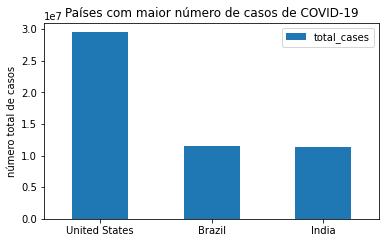

In [5]:
# plotando gráfico de linhas para top 3 países em número de casos
top_3_total_cases = df.loc[df.continent.notna()].loc[df.date == df.date.max(), ['location','total_cases']].sort_values(by='total_cases', ascending=False) [:3]
fig, ax = plt.subplots ()
top_3_total_cases.plot(x='location', y='total_cases', kind="bar", ax=ax)
ax.set_title("Países com maior número de casos de COVID-19")
ax.set_ylabel("número total de casos")
ax.set_xlabel("")
fig.autofmt_xdate(rotation=0, ha='center')

### Países com maior números de óbitos por COVID-19

Vamos verificar agora os **países líderes em número de óbitos por COVID-19** até o momento desta análise.

In [6]:
# imprimindo por ordem de maior número de óbitos
df.loc[df.date == df.date.max()].sort_values(by= 'total_deaths', ascending=False).head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
74006,OWID_WRL,NaN,World,2021-03-15,120218060.0,342857.0,429403.714,2660456.0,6804.0,8573.286,15422.856,43.985,55.088,341.312,0.873,1.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,381341856.0,225766827.0,85589474.0,8337585.0,9719666.0,4.89,2.90,1.10,1247.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
23262,OWID_EUR,NaN,Europe,2021-03-15,36583536.0,115931.0,167146.857,860892.0,2910.0,3065.143,48864.044,154.847,223.255,1149.880,3.887,4.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49803,OWID_NAM,NaN,North America,2021-03-15,33961529.0,65175.0,68044.286,780103.0,1074.0,2025.143,57360.452,110.079,114.926,1317.581,1.814,3.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23680,OWID_EUN,NaN,European Union,2021-03-15,24190468.0,78338.0,130449.429,578035.0,2022.0,2134.286,54370.492,176.072,293.198,1299.191,4.545,4.797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50805109.0,35560656.0,15244453.0,487146.0,1107675.0,11.42,7.99,3.43,2490.0,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71567,USA,North America,United States,2021-03-15,29495424.0,56649.0,55332.571,535628.0,740.0,1356.571,89109.330,171.144,167.167,1618.199,2.236,4.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109081860.0,71054445.0,38335432.0,2021586.0,2427430.0,32.62,21.25,11.46,7258.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
62652,OWID_SAM,NaN,South America,2021-03-15,19317552.0,59365.0,93734.429,499415.0,1663.0,2374.714,44845.302,137.815,217.603,1159.382,3.861,5.513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3922,OWID_ASI,NaN,Asia,2021-03-15,26276669.0,93869.0,90265.857,410981.0,843.0,821.857,5663.261,20.231,19.454,88.576,0.182,0.177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10022,BRA,South America,Brazil,2021-03-15,11519609.0,36239.0,66849.143,279286.0,1057.0,1841.143,54194.773,170.489,314.496,1313.920,4.973,8.662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11895560.0,8919356.0,2976204.0,472894.0,230058.0,5.60,4.20,1.40,1082.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.7

Os 3 países com maior número de óbitos por COVID-19 até o momento (15 de Março de 2021) são:

* Estados Unidos: 535.628 óbitos
* Brasil : 279.286 óbitos
* México : 194.944 óbitos

É interessante observar que apesar da Índia estar no top 3 países com maiores números de casos de COVID-19, o México a ultrapassa em número de óbitos, o que pode indicar a possibilidade de uma alta taxa de letalidade no México.
Faremos este cálculo em seguida.

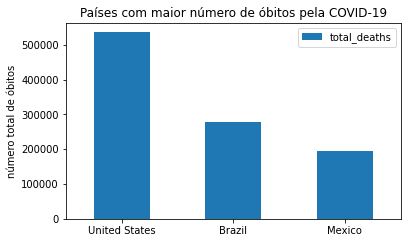

In [7]:
# plotando gráfico de linhas para top 3 países em número de óbitos
top_3_total_deaths = df.loc[df.continent.notna()].loc[df.date == df.date.max(), ['location','total_deaths']].sort_values(by='total_deaths', ascending=False) [:3]
fig, ax = plt.subplots ()
top_3_total_deaths.plot(x='location', y='total_deaths', kind="bar", ax=ax)
ax.set_title("Países com maior número de óbitos pela COVID-19")
ax.set_ylabel("número total de óbitos")
ax.set_xlabel("")
fig.autofmt_xdate(rotation=0, ha='center')

### Taxa de mortalidade da COVID-19

Vamos calcular a **taxa de mortalidade** do vírus no mundo e também nos 3 países líderes em óbitos.

A taxa de mortalidade é a proporção de óbitos em relação à população total.


Vale ressaltar que essa taxa é dinâmica e sofre alterações no decorrer da pandemia.

In [8]:
# taxa de mortalidade
print("Taxa de mortalidade no mundo:  ",round((df.total_deaths.max())/(df.population.max()) *100,3),"%")
print("Taxa de mortalidade nos EUA:   ",round((df.loc[df.location == 'United States'].total_deaths.max())/(df.loc[df.location == 'United States'].population.max()) *100,3),"%")
print("Taxa de mortalidade no Brasil: ",round((df.loc[df.location == 'Brazil'].total_deaths.max())/(df.loc[df.location == 'Brazil'].population.max()) *100,3),"%")
print("Taxa de mortalidade no México: ",round((df.loc[df.location == 'Mexico'].total_deaths.max())/(df.loc[df.location == 'Mexico'].population.max()) *100,3),"%")

Taxa de mortalidade no mundo:   0.034 %
Taxa de mortalidade nos EUA:    0.162 %
Taxa de mortalidade no Brasil:  0.131 %
Taxa de mortalidade no México:  0.151 %


### Taxa de letalidade da COVID-19

Diferentemente da taxa de mortalidade, vamos agora calcular a **taxa de letalidade** que é a proporção de pessoas infectadas que evoluem para óbtido, ou seja, avalia o número de óbitos em relação às pessoas que apresentam a doença ativa, e não em relação à população toda.

Faremos isto para o mundo e também para os 3 países líderes em óbitos.

Vale ressaltar que essa taxa assim como a de mortalidade é dinâmica e sofre alterações no decorrer da pandemia.

In [9]:
# taxa de letalidade
print("Taxa de letalidade no mundo:  ",round((df.total_deaths.max())/(df.total_cases.max()) *100,2),"%")
print("Taxa de letalidade nos EUA:   ",round((df.loc[df.location == 'United States'].total_deaths.max())/(df.loc[df.location == 'United States'].total_cases.max())*100,2),"%")
print("Taxa de letalidade no Brasil: ",round((df.loc[df.location == 'Brazil'].total_deaths.max())/(df.loc[df.location == 'Brazil'].total_cases.max())*100,2),"%")
print("Taxa de letalidade no México: ",round((df.loc[df.location == 'Mexico'].total_deaths.max())/(df.loc[df.location == 'Mexico'].total_cases.max())*100,2),"%")


Taxa de letalidade no mundo:   2.21 %
Taxa de letalidade nos EUA:    1.82 %
Taxa de letalidade no Brasil:  2.42 %
Taxa de letalidade no México:  8.99 %


### Avanço da doença no mundo

Vamos plotar agora um gráfico de linhas afim de visualizar a evolução de óbitos por COVID-19 no mundo, desde o início da pandemia.



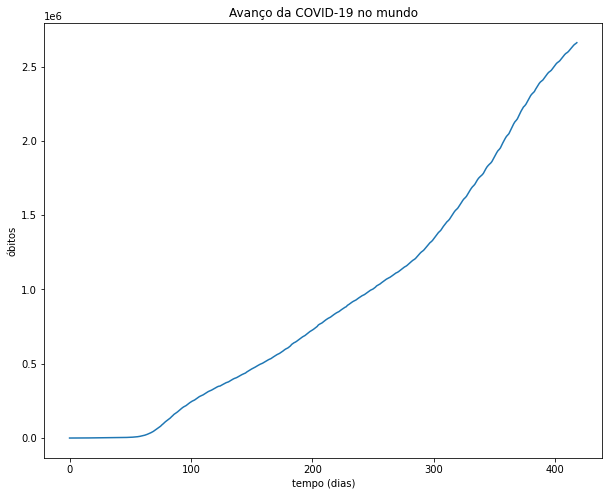

In [10]:
# gráfico de linhas para número de óbitos
df_mundo_td = df.loc[df.location == 'World','total_deaths']
fig,ax = plt.subplots(figsize=(10,8))
df_mundo_td.reset_index(drop=True).plot(kind='line', ax=ax)
ax.set_title("Avanço da COVID-19 no mundo")
ax.set_ylabel("óbitos")
ax.set_xlabel("tempo (dias)")
plt.show()

É muito claro que pouco antes de 100 dias após o primeiro caso de COVID-19 o mundo passa a sofrer com a forte ascensão da curva de óbitos (e permanece em acensão).

### Avanço da vacinação no mundo

<center><img width="40%" src="http://images.unsplash.com/photo-1608243499710-5ebece89a37d?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max"></center>

<center>Photo by <a href="https://unsplash.com/@hakannural?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Hakan Nural</a> on <a href="/s/photos/vaccine?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></center>
  

Conforme vimos até agora, a doença continua em crescimento exponencial no mundo.

Graças à ciência, a vacinação contra COVID-19 já está acontecendo e também está avançando. É isso que vamos analisar agora.

Primeiramente, vamos plotar um gráfico de linhas para pessoas que receberam pelo menos uma dose de vacina até o momento desta análise.

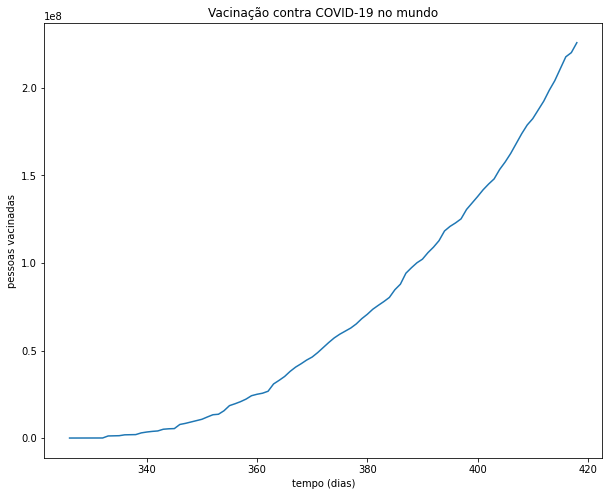

In [12]:
df_mundo_pv = df.loc[df.location == 'World','people_vaccinated']
fig,ax = plt.subplots(figsize=(10,8))
df_mundo_pv.reset_index(drop=True).plot()
ax.set_title("Vacinação contra COVID-19 no mundo")
ax.set_ylabel("pessoas vacinadas")
ax.set_xlabel("tempo (dias)")
plt.show()

O gráfico plotado acima nos mostra que a vacinação só teve início mais de 300 dias após o primeiro caso de COVID-19, ou seja, quase um ano.

Vamos visualizar as curvas do avanço do número de casos e do avanço da vacinação (pessoas que receberam pelo menos uma dose de vacina).

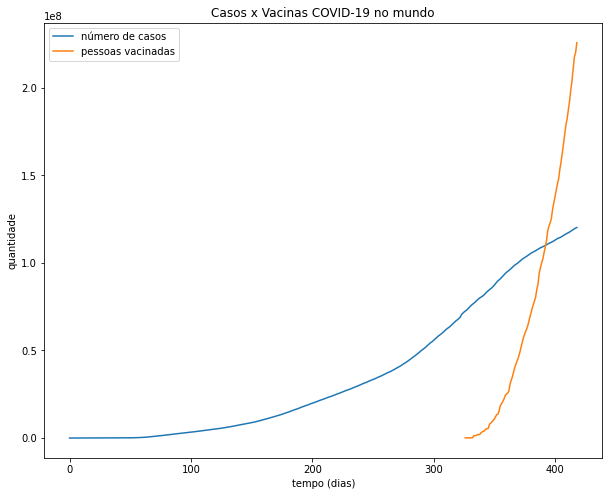

In [13]:
df_mundo_tc = df.loc[df.location == 'World','total_cases']
fig,ax = plt.subplots(figsize=(10,8))
df_mundo_tc.reset_index(drop=True).plot()
df_mundo_pv.reset_index(drop=True).plot()
ax.set_title("Casos x Vacinas COVID-19 no mundo")
ax.set_ylabel("quantidade")
ax.set_xlabel("tempo (dias)")
ax.legend(('número de casos','pessoas vacinadas'))
plt.show()


A partir desse gráfico de casos x vacinas é possível perceber:
* ainda estamos no início da vacinação, visto que ela teve início mais de 300 dias após os primeiros casos de COVID-19.
* o número de pessoas que receberam pelo menos uma dose de vacina já superou o número de casos com menos de 100 dias de vacinação.


## A COVID-19 no Brasil

Já foi possível ter uma noção de como a doença e a vacinação está caminhando no mundo, e infelizmente o Brasil está entre os países líderes em casos e em mortes, conforme visto anteriormente.

Vamos explorar agora um pouco mais os dados referentes ao Brasil.

In [14]:
# criando uma cópia do dataframe filtrando somente o Brasil
df_brasil = df.loc[df.location == 'Brazil'].copy()

# visualizando as primeiras entradas
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9639,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9640,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9641,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9642,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9643,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


A partir deste *dataset*, vamos identificar os seguintes dados:
* a data do primeiro caso registrado de COVID-19 no Brasil
* a data do primeiro óbito registrado por COVID-19 no Brasil
* o tempo entre o primeiro caso e o primeiro óbito registrados por COVID-19 no Brasil
* quantos casos registrados haviam na data do primeiro óbito registradopor COVID-19 no Brasil

In [15]:
# primeiro caso no Brasil 
caso1br=df_brasil.loc[df_brasil.total_cases != 0.0].head(1)
caso1br


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9639,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [16]:
# primeiro óbito no Brasil
obito1br=df_brasil.loc[df_brasil.total_deaths.notna()].head(1)
obito1br


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9659,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,0.143,1.51,0.569,0.195,0.005,0.005,0.001,2.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [17]:
# tempo entre primeiro caso e primeiro óbito
from datetime import date
obito1br.date.reset_index(drop=True) - caso1br.date.reset_index(drop=True)


0   20 days
Name: date, dtype: timedelta64[ns]

In [21]:
# quantidade de casos quando registrou primeiro óbito
obito1br.total_cases

9659    321.0
Name: total_cases, dtype: float64

Acima foram identificados os seguintes dados:
* o primeiro caso de COVID-19 no Brasil foi registrado em 26/02/2020.
* o primeiro óbito por COVID-19 no Brasil foi registrado em 17/03/2020.
* se passaram 20 dias entre o primeiro caso e o primeiro óbito registrados por COVID-19 no Brasil.
* haviam 321 casos quando foi registrado o primeiro óbito por COVID-19 no Brasil.

Para finalizar, vamos plotar um gráfico de linhas para compararmos a evolução dos casos e vacinas da COVID-19 no Brasil.

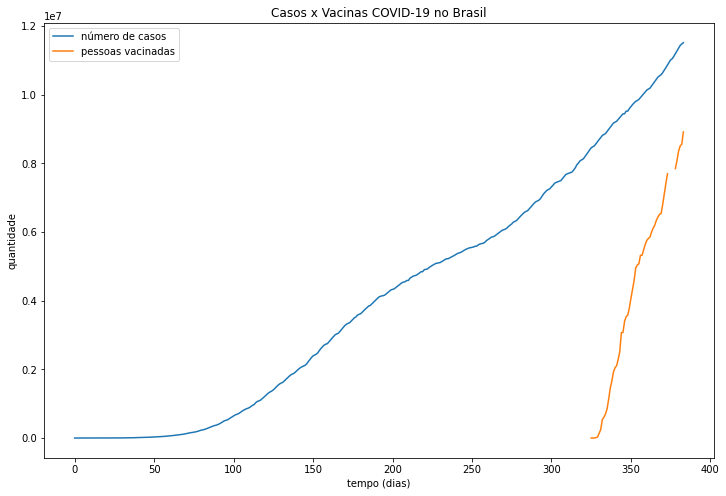

In [18]:
# plotando gráfico de linhas para casos e vacinas
fig, ax = plt.subplots(figsize=(12,8))
df_brasil.total_cases.reset_index(drop=True).plot()
df_brasil.people_vaccinated.reset_index(drop=True).plot()
ax.set_title("Casos x Vacinas COVID-19 no Brasil")
ax.set_ylabel("quantidade")
ax.set_xlabel("tempo (dias)")
ax.legend(('número de casos','pessoas vacinadas'))
plt.show()


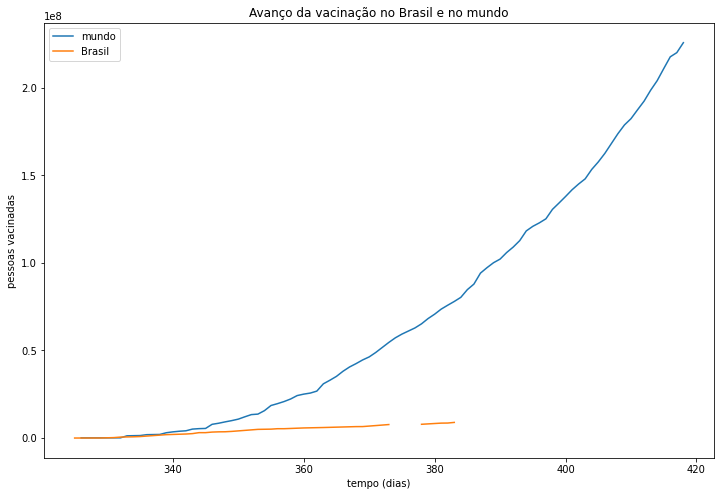

In [23]:
# plotando gráfico de linhas para vacinas no Brasil e no mundo
fig, ax = plt.subplots(figsize=(12,8))
df_mundo_pv.reset_index(drop=True).plot()
df_brasil.people_vaccinated.reset_index(drop=True).plot()
ax.set_title("Avanço da vacinação no Brasil e no mundo")
ax.set_ylabel("pessoas vacinadas")
ax.set_xlabel("tempo (dias)")
ax.legend(('mundo','Brasil'))
plt.show()

A partir desses dois gráficos plotados acima, podemos pontuar:
* o número de casos no Brasil infelizmente ainda é superior ao número de pessoas vacinadas no Brasil
* o avanço da vacinação no Brasil ainda é absurdamente inferior comparada ao avanço da vacinação no mundo.

## Conclusão

Primeiramente, é importante voltar a ressaltar que os dados utilizados para esta análise são diariamente atualizados, fazendo com que esta análise seja pertinente por um curto período de tempo.

Tendo isso em vista, podemos destacar:

* Os Estados Unidos é o país líder em casos e óbitos pela COVID-19.
* As taxas de mortalidade e letalidade do vírus atingem valores preocupantes.
* A evolução dos casos e óbitos ainda está em crescimento no Brasil e no mundo.
* A evolução da vacinação também está em crescimento e já ultrapassou o número de casos de COVID-19 no mundo.
* O Brasil ainda tem número de casos maior que o número de pessoas vacinadas.

Outras análises mais aprofundadas podem ser feitas a partir dessa EDA onde já foi possível extrair muitas informações pertinentes sobre a COVID-19 no Brasil e no mundo.